<a href="https://colab.research.google.com/github/jglasgo2/BUS60095/blob/main/BUS60095_FinalAssignment_Glasgow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Analysis and Natural Language Processing

Final Assignment

Jeremy Glasgow

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
!pip install torch torchvision torchaudio
!pip install transformers --upgrade

nltk.download("stopwords")
nltk.download("punkt")

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**1. Data Acquisition**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
pathToCsv = '/content/drive/MyDrive/car_reviews_large.csv'
data = pd.read_csv(pathToCsv)

Mounted at /content/drive


EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110121 entries, 0 to 110120
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   reviewid           110121 non-null  int64  
 1   make               110121 non-null  object 
 2   model              110121 non-null  object 
 3   year               110121 non-null  int64  
 4   title              110111 non-null  object 
 5   author             110109 non-null  object 
 6   perform_rating     110121 non-null  int64  
 7   comfort_rating     110121 non-null  int64  
 8   fuel_econ_rating   110121 non-null  int64  
 9   fun_rating         110121 non-null  int64  
 10  interior_rating    110121 non-null  int64  
 11  exterior_rating    110121 non-null  int64  
 12  build_qual_rating  110121 non-null  int64  
 13  reliab_rating      110121 non-null  int64  
 14  text               108671 non-null  object 
 15  fav_feat           84292 non-null   object 
 16  su

In [4]:
data.head()

,reviewid,make,model,year,title,author,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,...,exterior_rating,build_qual_rating,reliab_rating,text,fav_feat,sugg_imp,cnt_thumbs_down,cnt_thumbs_up,comment_cnt,Avg_MSRP
0,1,ACURA,ILX,2017,A new Dud,Laurel Blue,0,0,0,0,...,0,0,0,I just leased a new 2017 Acura ILX two months ...,NaN,NaN,0,0,0.0,31203.33333
1,2,ACURA,ILX,2015,Noisy as heck !,Seth L,0,0,0,0,...,0,0,0,"Transmission hums all the time. Acura claims, ...",NaN,NaN,1,2,0.0,29375.00000
2,3,ACURA,ILX,2015,Great entry level luxury car,NicBran,0,0,0,0,...,0,0,0,"Before purchasing this car, I had a Mazda RX-8...",NaN,NaN,0,5,0.0,29375.00000
3,4,ACURA,ILX,2015,Amazing Car!,robin707,5,5,4,5,...,5,5,5,I just purchased the 2015 ILX 2.4 6 speed manu...,"Interior is amazing and so comfortable, the tr...","I'm not sure, maybe GPS and a little bit bette...",0,3,0.0,29375.00000
4,5,ACURA,ILX,2015,My ILX is a great car,stevenrose,5,5,5,5,...,5,5,5,I really enjoy owning my ILX. The ILX offers ...,Why is the ILX not just a Civic EX-L?\r\r\r\n\...,Road noise and the suspension can be a bit sti...,0,18,0.0,29375.00000


In [5]:
data["year"].describe()

count    110121.000000
mean       2009.810999
std           2.794950
min        2007.000000
25%        2008.000000
50%        2009.000000
75%        2011.000000
max        2017.000000
Name: year, dtype: float64

Exploring engagement metric features

In [6]:
print(f'Total thumbs up: {data["cnt_thumbs_up"].sum()}')
print(f'Total thumbs down: {data["cnt_thumbs_down"].sum()}')
print(f'Total comments: {data["comment_cnt"].sum()}')

Total thumbs up: 4305592
Total thumbs down: 6812325
Total comments: 13174.0


In [7]:
print(f'Ratio of thumbs up to thumbs down: {(data["cnt_thumbs_up"].sum() / data["cnt_thumbs_down"].sum())}')
print(f'Ratio of thumbs up to comment count: {(data["cnt_thumbs_up"].sum() / data["comment_cnt"].sum())}')
print(f'Ratio of thumbs down to comment count: {(data["cnt_thumbs_down"].sum() / data["comment_cnt"].sum())}')

Ratio of thumbs up to thumbs down: 0.6320297402135101
Ratio of thumbs up to comment count: 326.82495825110067
Ratio of thumbs down to comment count: 517.1037649916502


Visualize distribution of engagement features

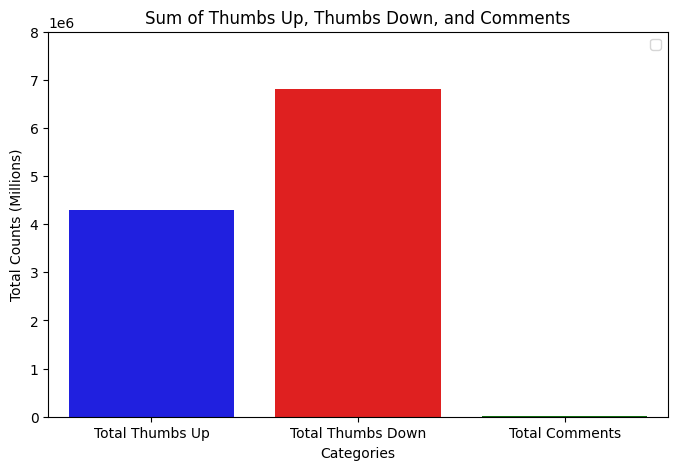

In [8]:
_sums = {
    'Total Thumbs Up': data["cnt_thumbs_up"].sum(),
    'Total Thumbs Down': data["cnt_thumbs_down"].sum(),
    'Total Comments': data["comment_cnt"].sum()
}

sums_df = pd.DataFrame(list(_sums.items()), columns=['Category', 'Total'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Total', data=sums_df, palette=['blue', 'red', 'green'])
plt.xlabel('Categories')
plt.ylabel('Total Counts (Millions)')
plt.ylim(0, 8000000)
plt.title('Sum of Thumbs Up, Thumbs Down, and Comments')
plt.legend(loc='upper right')
plt.show()

In [9]:
data["total_eng"] = data["cnt_thumbs_down"] + data["cnt_thumbs_up"] + data["comment_cnt"]

In [10]:
data["total_eng"].describe()

count    109855.000000
mean        101.319385
std        4272.324169
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max      362927.000000
Name: total_eng, dtype: float64

In [11]:
data['total_eng'].fillna(data['total_eng'].mean(), inplace=True)
data["total_eng"].describe()

count    110121.000000
mean        101.319385
std        4267.161050
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max      362927.000000
Name: total_eng, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110121 entries, 0 to 110120
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   reviewid           110121 non-null  int64  
 1   make               110121 non-null  object 
 2   model              110121 non-null  object 
 3   year               110121 non-null  int64  
 4   title              110111 non-null  object 
 5   author             110109 non-null  object 
 6   perform_rating     110121 non-null  int64  
 7   comfort_rating     110121 non-null  int64  
 8   fuel_econ_rating   110121 non-null  int64  
 9   fun_rating         110121 non-null  int64  
 10  interior_rating    110121 non-null  int64  
 11  exterior_rating    110121 non-null  int64  
 12  build_qual_rating  110121 non-null  int64  
 13  reliab_rating      110121 non-null  int64  
 14  text               108671 non-null  object 
 15  fav_feat           84292 non-null   object 
 16  su

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["total_eng_scaled"] = scaler.fit_transform(data[["total_eng"]])

In [14]:
data["total_eng_scaled"].describe()

count    1.101210e+05
mean    -3.097143e-18
std      1.000005e+00
min     -2.374409e-02
25%     -2.374409e-02
50%     -2.350974e-02
75%     -2.280669e-02
max      8.502780e+01
Name: total_eng_scaled, dtype: float64

**2. Text Preprocessing**

View missing values in columns

In [15]:
for column in data.columns:
  print(column, data[column].isna().sum())

reviewid 0
make 0
model 0
year 0
title 10
author 12
perform_rating 0
comfort_rating 0
fuel_econ_rating 0
fun_rating 0
interior_rating 0
exterior_rating 0
build_qual_rating 0
reliab_rating 0
text 1450
fav_feat 25829
sugg_imp 27407
cnt_thumbs_down 0
cnt_thumbs_up 0
comment_cnt 266
Avg_MSRP 0
total_eng 0
total_eng_scaled 0


In [16]:
data["text"].head(10)

0    I just leased a new 2017 Acura ILX two months ...
1    Transmission hums all the time. Acura claims, ...
2    Before purchasing this car, I had a Mazda RX-8...
3    I just purchased the 2015 ILX 2.4 6 speed manu...
4    I really enjoy owning my ILX.  The ILX offers ...
5    My family has had a few acuras. We have always...
6    The more I drive this car, the more I love it....
7    Disappointing with time.  This vehicle doesn't...
8    When I started looking at this car, I found it...
9    I bought my 2014 ILX 2.4 a little over a month...
Name: text, dtype: object

Tokenize

In [17]:
stop_words = set(stopwords.words("english"))

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

data["text"] = data["text"].astype(str)
data["tokens"] = data["text"].apply(tokenize)

In [18]:
data["tokens"].head(10)

0    [I, leased, new, Acura, ILX, two, months, ago,...
1    [Transmission, hums, time, Acura, claims, norm...
2    [Before, purchasing, car, I, Mazda, I, owned, ...
3    [I, purchased, ILX, speed, manual, must, say, ...
4    [I, really, enjoy, owning, ILX, The, ILX, offe...
5    [My, family, acuras, We, always, loved, From, ...
6    [The, I, drive, car, I, love, Like, many, othe...
7    [Disappointing, time, This, vehicle, feel, lik...
8    [When, I, started, looking, car, I, found, med...
9    [I, bought, ILX, little, month, ago, great, pu...
Name: tokens, dtype: object

Stemming

In [19]:
stemmer = SnowballStemmer("english")
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [20]:
data["tokens"].head(10)

0    [i, leas, new, acura, ilx, two, month, ago, th...
1    [transmiss, hum, time, acura, claim, normal, c...
2    [befor, purchas, car, i, mazda, i, own, year, ...
3    [i, purchas, ilx, speed, manual, must, say, fu...
4    [i, realli, enjoy, own, ilx, the, ilx, offer, ...
5    [my, famili, acura, we, alway, love, from, mdx...
6    [the, i, drive, car, i, love, like, mani, othe...
7    [disappoint, time, this, vehicl, feel, like, c...
8    [when, i, start, look, car, i, found, mediocr,...
9    [i, bought, ilx, littl, month, ago, great, pur...
Name: tokens, dtype: object

**3. Text Analysis**

In [21]:
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [22]:
data["clean_text"] = data["tokens"].apply(lambda x: " ".join(x))

Using textblob to get a sentiment score

In [23]:
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['sentiment_textblob'] = data['clean_text'].apply(get_textblob_sentiment)

In [24]:
data["sentiment_textblob"].describe()

count    110121.000000
mean          0.225784
std           0.197224
min          -1.000000
25%           0.100000
50%           0.224242
75%           0.344444
max           1.000000
Name: sentiment_textblob, dtype: float64

Using SentimentIntensityAnalyzer to get an additional sentiment score

In [25]:
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

data['sentiment_vader'] = data['clean_text'].apply(get_vader_sentiment)

In [26]:
data["sentiment_vader"].describe()

count    110121.000000
mean          0.566331
std           0.531935
min          -0.998600
25%           0.390600
50%           0.827100
75%           0.933700
max           0.999700
Name: sentiment_vader, dtype: float64

In [28]:
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased', tokenizer='distilbert-base-uncased')

def analyze_sentiment_batch(texts, max_length=512):
    texts = [text[:max_length] if len(text) > max_length else text for text in texts]

    results = sentiment_pipeline(texts)

    labels = [result['label'] for result in results]
    scores = [result['score'] for result in results]

    return labels, scores

def process_in_batches(data, batch_size=32, max_length=512):
    sentiment_labels = []
    sentiment_scores = []

    for start in range(0, len(data), batch_size):
        end = min(start + batch_size, len(data))
        batch_texts = data[start:end]
        labels, scores = analyze_sentiment_batch(batch_texts, max_length=max_length)
        sentiment_labels.extend(labels)
        sentiment_scores.extend(scores)

    return sentiment_labels, sentiment_scores

batch_size = 32
labels, scores = process_in_batches(data['clean_text'].tolist(), batch_size=batch_size)

data['sentiment_label'] = labels
data['sentiment_label_score'] = scores

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
data["sentiment_label"].describe()

count      110121
unique          2
top       LABEL_0
freq        60074
Name: sentiment_label, dtype: object

In [36]:
data["sentiment_label"].value_counts()

sentiment_label
LABEL_0    60074
LABEL_1    50047
Name: count, dtype: int64

In [37]:
data['sentiment_label'] = data['sentiment_label'].replace({'LABEL_0': 0, 'LABEL_1': 1})

In [181]:
sum(data["sentiment_label"].values == 0) / len(data)

0.545527192815176

In [38]:
data["sentiment_label"].describe()

count    110121.000000
mean          0.454473
std           0.497925
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: sentiment_label, dtype: float64

In [39]:
data["sentiment_label_score"].describe()

count    110121.000000
mean          0.505803
std           0.004482
min           0.500000
25%           0.502272
50%           0.504818
75%           0.508354
max           0.536237
Name: sentiment_label_score, dtype: float64

In [40]:
sentimentFeatures = ["sentiment_textblob", "sentiment_vader", "sentiment_label", "sentiment_label_score"]

**4. Feature Analysis and Feature Selection**

In [41]:
ratingFeatures = []

for col in data.columns:
  if "rating" in col:
    ratingFeatures.append(col)

print(f"Rating Features: {ratingFeatures}")

Rating Features: ['perform_rating', 'comfort_rating', 'fuel_econ_rating', 'fun_rating', 'interior_rating', 'exterior_rating', 'build_qual_rating', 'reliab_rating']


In [42]:
data[ratingFeatures].describe()

,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,interior_rating,exterior_rating,build_qual_rating,reliab_rating
count,110121.000000,110121.000000,110121.000000,110121.000000,110121.000000,110121.000000,110121.000000,110121.000000
mean,3.695117,3.745725,3.438708,3.734637,3.721879,3.872976,3.651202,3.717974
std,1.849023,1.835550,1.801905,1.869711,1.835980,1.835164,1.917184,1.936384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [43]:
carMake = data.groupby("make")[ratingFeatures].mean()
carMake_sorted = carMake.sort_values(by=ratingFeatures, ascending=False)
carMake_sorted

,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,interior_rating,exterior_rating,build_qual_rating,reliab_rating
make,,,,,,,,
SPYKER,5.000000,5.000000,4.000000,4.333333,4.666667,4.333333,4.666667,4.333333
BUGATTI,5.000000,4.375000,2.625000,5.000000,4.625000,5.000000,4.875000,4.625000
LOTUS,5.000000,3.333333,4.333333,4.833333,3.916667,4.833333,4.000000,4.333333
MAYBACH,4.500000,5.000000,4.500000,4.500000,5.000000,4.500000,5.000000,4.000000
LAMBORGHINI,4.500000,4.166667,3.333333,4.333333,4.083333,4.500000,4.416667,4.166667
PONTIAC,4.480174,4.430744,4.060837,4.557849,4.321021,4.617056,4.343292,4.462792
ASTON-MARTIN,4.470588,4.294118,2.764706,4.588235,4.352941,4.705882,4.000000,3.882353
MERCURY,4.344872,4.497436,4.105128,4.371795,4.402564,4.489744,4.376923,4.462821
SAAB,4.326087,4.434783,3.130435,4.260870,4.239130,4.369565,4.304348,4.391304


In [44]:
carYear = data.groupby("year")[ratingFeatures].mean()
carYear_sorted = carYear.sort_values(by=ratingFeatures, ascending=False)
carYear_sorted

,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,interior_rating,exterior_rating,build_qual_rating,reliab_rating
year,,,,,,,,
2007,4.344576,4.390021,3.935254,4.400000,4.345040,4.527248,4.272868,4.349758
2008,4.312184,4.352781,3.916338,4.368708,4.332655,4.495867,4.250941,4.326033
2009,4.273743,4.290405,4.007984,4.313871,4.282630,4.466815,4.232852,4.315746
2010,4.235721,4.307133,3.979287,4.272741,4.282711,4.428240,4.238658,4.311461
2011,3.820261,3.935594,3.701661,3.865468,3.903050,4.067810,3.773284,3.830202
2012,3.396162,3.481212,3.395960,3.429899,3.458384,3.630303,3.396566,3.484646
2013,3.169127,3.283312,3.126145,3.176789,3.267053,3.411325,3.109512,3.161839
2014,2.652355,2.728301,2.599492,2.657202,2.710526,2.855956,2.587027,2.645429
2015,1.049393,1.068327,1.043836,1.048570,1.057831,1.088496,1.035398,1.056596


Collect linear coefficients

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ratingFeatures + sentimentFeatures
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating              -104.062016
reliab_rating            -23.867845
sentiment_textblob       -19.238569
interior_rating           -7.524936
sentiment_label           -3.529108
sentiment_label_score     10.393675
comfort_rating            14.058523
sentiment_vader           27.030655
perform_rating            27.278793
fuel_econ_rating          35.254337
exterior_rating           40.491340
build_qual_rating         57.946367
dtype: float64
R² score: 0.00018053825926078737


In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ratingFeatures + ["sentiment_textblob", "sentiment_vader", "sentiment_label"]
_x = data[predictors]
_y = data["total_eng_scaled"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -0.024376
reliab_rating        -0.005658
sentiment_textblob   -0.004463
interior_rating      -0.001735
sentiment_label      -0.001153
comfort_rating        0.003243
sentiment_vader       0.006172
perform_rating        0.006414
fuel_econ_rating      0.008259
exterior_rating       0.009379
build_qual_rating     0.013612
dtype: float64
R² score: 0.00017476158828266808


In [48]:
predictors = ratingFeatures + ["sentiment_textblob", "sentiment_vader"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -103.730885
reliab_rating         -24.316608
sentiment_textblob    -18.847867
interior_rating        -7.423682
comfort_rating         13.586913
sentiment_vader        26.232579
perform_rating         27.258886
fuel_econ_rating       35.386077
exterior_rating        39.914217
build_qual_rating      58.160164
dtype: float64
R² score: 0.00017343664113456114


In [49]:
predictors = ratingFeatures + ["sentiment_textblob", "sentiment_vader"]
_x = data[predictors]
_y = data["total_eng_scaled"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -0.024309
reliab_rating        -0.005699
sentiment_textblob   -0.004417
interior_rating      -0.001740
comfort_rating        0.003184
sentiment_vader       0.006148
perform_rating        0.006388
fuel_econ_rating      0.008293
exterior_rating       0.009354
build_qual_rating     0.013630
dtype: float64
R² score: 0.00017343664113467216


In [50]:
predictors = ratingFeatures + ["sentiment_vader"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating          -104.578554
reliab_rating        -23.648041
interior_rating       -8.441596
comfort_rating        12.835516
sentiment_vader       16.223416
perform_rating        27.508939
fuel_econ_rating      35.287893
exterior_rating       41.156293
build_qual_rating     57.500596
dtype: float64
R² score: 0.00015988849726178422


In [51]:
predictors = ratingFeatures + ["sentiment_textblob"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -99.924863
reliab_rating        -17.159554
interior_rating       -8.077202
sentiment_textblob    -6.253917
comfort_rating        10.781404
perform_rating        26.633547
exterior_rating       29.568718
fuel_econ_rating      35.249015
build_qual_rating     66.322349
dtype: float64
R² score: 0.0001497107361345673


In [52]:
predictors = ratingFeatures + ["sentiment_textblob"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -99.924863
reliab_rating        -17.159554
interior_rating       -8.077202
sentiment_textblob    -6.253917
comfort_rating        10.781404
perform_rating        26.633547
exterior_rating       29.568718
fuel_econ_rating      35.249015
build_qual_rating     66.322349
dtype: float64
R² score: 0.0001497107361345673


In [53]:
predictors = ["sentiment_textblob", "sentiment_vader"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

sentiment_textblob   -16.408360
sentiment_vader       33.282592
dtype: float64
R² score: 4.27071081955388e-05


In [54]:
data.groupby(data["year"])["total_eng"].mean()

year
2007     27.218678
2008      8.926850
2009      1.069489
2010     26.386169
2011    120.727979
2012    117.090497
2013    874.680478
2014    834.332750
2015     12.106686
2016      9.852433
2017     13.458182
Name: total_eng, dtype: float64

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ratingFeatures + sentimentFeatures + ["year"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating               -78.821088
sentiment_textblob       -11.627705
sentiment_label           -7.464803
interior_rating           -0.792826
reliab_rating             -0.027214
fuel_econ_rating           4.215039
sentiment_vader            7.633343
sentiment_label_score     11.586711
comfort_rating            37.819209
build_qual_rating         43.513453
perform_rating            54.425820
exterior_rating          106.444624
year                     198.124419
dtype: float64
R² score: 0.0014877353381507197


In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ["year", "fun_rating", "exterior_rating", "perform_rating", "sentiment_textblob"]
_x = data[predictors]
_y = data["total_eng"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating            -50.891234
sentiment_textblob     -5.049739
perform_rating         81.187264
exterior_rating       132.778756
year                  198.537020
dtype: float64
R² score: 0.0014469092382091153


In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ["year", "fun_rating", "exterior_rating", "perform_rating", "sentiment_textblob"]
_x = data[predictors]
_y = data["total_eng_scaled"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -0.011926
sentiment_textblob   -0.001183
perform_rating        0.019026
exterior_rating       0.031117
year                  0.046527
dtype: float64
R² score: 0.0014469092382092263


In [58]:
data.groupby(data["make"])["total_eng"].mean()

make
ACURA             134.399074
ALFA-ROMEO          9.000000
ASTON-MARTIN        4.647059
AUDI               99.021353
BENTLEY             3.114286
BMW                65.354142
BUGATTI             0.875000
BUICK               5.433743
CADILLAC            4.566391
CHEVROLET          27.061472
CHRYSLER            4.027596
DODGE              48.534371
FERRARI             2.416667
FIAT               10.044546
FISKER             44.000000
FORD               46.890333
GENESIS            39.106462
GMC                 4.244657
HONDA              66.227584
HUMMER              1.795918
HYUNDAI             4.357215
INFINITI          105.894916
ISUZU               0.666667
JAGUAR            469.563910
JEEP                5.665229
KIA                 5.585835
LAMBORGHINI         2.916667
LAND-ROVER          5.351504
LEXUS             149.583458
LINCOLN             3.717318
LOTUS               1.333333
MASERATI           10.462687
MAYBACH             0.000000
MAZDA              21.503788
MCLAREN  

In [61]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoded_columns = encoder.fit_transform(data[['make']])

column_names = encoder.categories_[0]

encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded.head()

,reviewid,make,model,year,title,author,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,...,SATURN,SCION,SMART,SPYKER,SUBARU,SUZUKI,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
0,1,ACURA,ILX,2017,A new Dud,Laurel Blue,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,ACURA,ILX,2015,Noisy as heck !,Seth L,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,ACURA,ILX,2015,Great entry level luxury car,NicBran,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,ACURA,ILX,2015,Amazing Car!,robin707,5,5,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,ACURA,ILX,2015,My ILX is a great car,stevenrose,5,5,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ["year", "fun_rating", "exterior_rating", "perform_rating", "sentiment_textblob"] + list(encoded_df.columns)
_x = data_encoded[predictors]
_y = data_encoded["total_eng_scaled"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

fun_rating           -0.009080
KIA                  -0.005999
HYUNDAI              -0.005197
MAZDA                -0.005055
FORD                 -0.004771
JEEP                 -0.003739
CHEVROLET            -0.003723
MERCEDES-BENZ        -0.003624
BUICK                -0.002917
FIAT                 -0.002569
RAM                  -0.002387
HONDA                -0.002374
CADILLAC             -0.002368
GMC                  -0.002276
LINCOLN              -0.002268
MITSUBISHI           -0.002253
LAND-ROVER           -0.001518
MINI                 -0.001173
CHRYSLER             -0.001172
sentiment_textblob   -0.001135
BMW                  -0.001033
PONTIAC              -0.001011
MASERATI             -0.000865
MERCURY              -0.000794
AUDI                 -0.000753
SMART                -0.000706
DODGE                -0.000647
ASTON-MARTIN         -0.000374
FISKER               -0.000294
GENESIS              -0.000292
ROLLS-ROYCE          -0.000271
LAMBORGHINI          -0.000219
NISSAN  

**5. Model Testing and Model Building**

In [63]:
randomNum = 13

In [67]:
predictors = sentimentFeatures

In [68]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [69]:
print(f"xTrain: {xTrain.shape}")
print(f"xVal: {xVal.shape}")
print(f"xTest: {xTest.shape}")
print(f"yTrain: {yTrain.shape}")
print(f"yVal: {yVal.shape}")
print(f"yTest: {yTest.shape}")

xTrain: (77084, 4)
xVal: (22134, 4)
xTest: (10903, 4)
yTrain: (77084,)
yVal: (22134,)
yTest: (10903,)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [71]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 216.3719949654891


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(1)
])

In [73]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 3s 4ms/step - loss: 17751260.0000 - mean_absolute_error: 99.9053 - val_loss: 15804541.0000 - val_mean_absolute_error: 100.3909
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 17748514.0000 - mean_absolute_error: 111.9949 - val_loss: 15800737.0000 - val_mean_absolute_error: 124.1384
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 17744270.0000 - mean_absolute_error: 144.0919 - val_loss: 15797858.0000 - val_mean_absolute_error: 152.2911
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 17742240.0000 - mean_absolute_error: 175.3439 - val_loss: 15797109.0000 - val_mean_absolute_error: 166.4157
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 17741356.0000 - mean_absolute_error: 175.1791 - val_loss: 15796611.0000 - val_mean_absolute_error: 178.6723
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 17740998.0000 - m

In [74]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 219.34413814595374


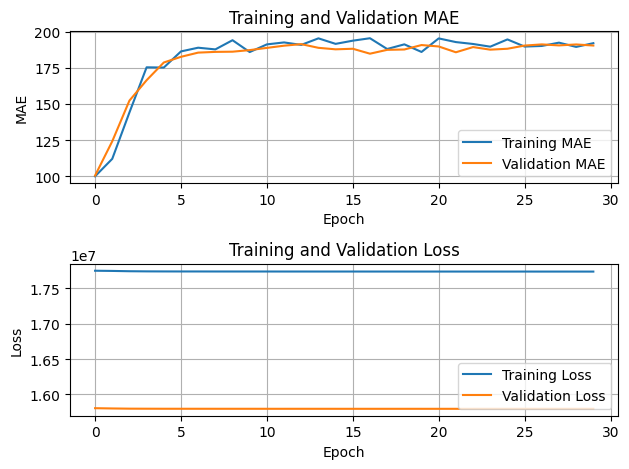

In [75]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [76]:
predictors = ratingFeatures

In [77]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [78]:
print(f"xTrain: {xTrain.shape}")
print(f"xVal: {xVal.shape}")
print(f"xTest: {xTest.shape}")
print(f"yTrain: {yTrain.shape}")
print(f"yVal: {yVal.shape}")
print(f"yTest: {yTest.shape}")

xTrain: (77084, 8)
xVal: (22134, 8)
xTest: (10903, 8)
yTrain: (77084,)
yVal: (22134,)
yTest: (10903,)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [80]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 216.3719949654891


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(1)
])

In [82]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 17750750.0000 - mean_absolute_error: 102.7292 - val_loss: 15802792.0000 - val_mean_absolute_error: 107.9210
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 17745426.0000 - mean_absolute_error: 128.4517 - val_loss: 15796336.0000 - val_mean_absolute_error: 156.0674
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 17742340.0000 - mean_absolute_error: 164.0190 - val_loss: 15795593.0000 - val_mean_absolute_error: 170.5844
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 17741988.0000 - mean_absolute_error: 182.5775 - val_loss: 15795464.0000 - val_mean_absolute_error: 170.3834
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 17741916.0000 - mean_absolute_error: 173.2791 - val_loss: 15795338.0000 - val_mean_absolute_error: 176.6704
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 17741764.0000 - 

In [83]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 217.260319184113


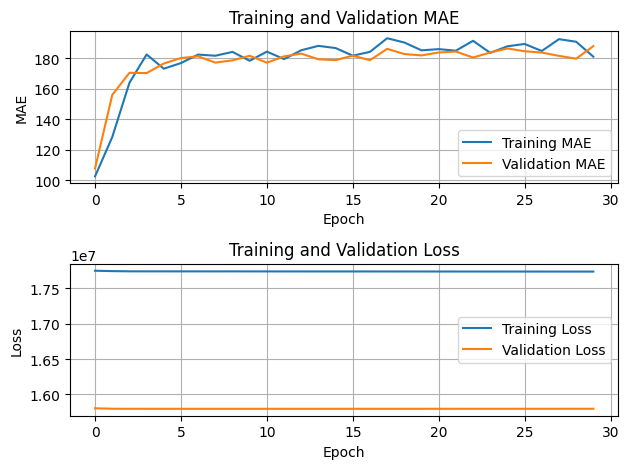

In [84]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [85]:
predictors = sentimentFeatures

In [86]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [88]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(1)
])

In [90]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 0.9832 - mean_absolute_error: 0.0796 - val_loss: 0.8689 - val_mean_absolute_error: 0.0591
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9761 - mean_absolute_error: 0.0622 - val_loss: 0.8682 - val_mean_absolute_error: 0.0457
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9753 - mean_absolute_error: 0.0597 - val_loss: 0.8689 - val_mean_absolute_error: 0.0513
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9752 - mean_absolute_error: 0.0540 - val_loss: 0.8693 - val_mean_absolute_error: 0.0566
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9751 - mean_absolute_error: 0.0560 - val_loss: 0.8686 - val_mean_absolute_error: 0.0574
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9751 - mean_absolute_error: 0.0545 - val_loss: 0.8720 - val_mean_absolute_error: 0.0705
Epoch 7/30
302/3

In [91]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 0.05268231198160145


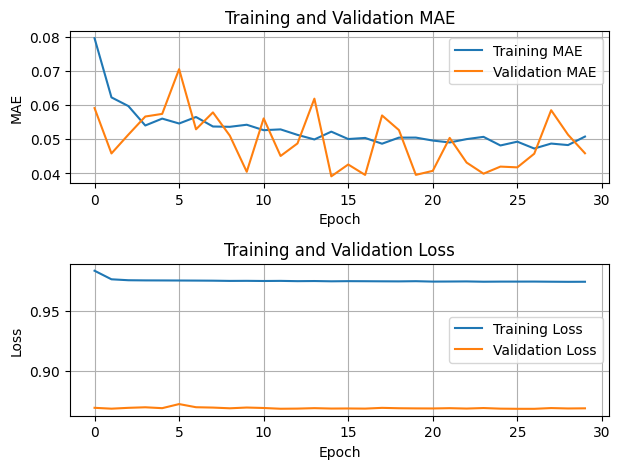

In [92]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
predictors = ratingFeatures + ["sentiment_vader"]

In [93]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [95]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu', input_shape=(len(predictors), )),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

In [97]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 3s 4ms/step - loss: 1.0075 - mean_absolute_error: 0.1329 - val_loss: 0.8702 - val_mean_absolute_error: 0.0513
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9782 - mean_absolute_error: 0.0688 - val_loss: 0.8681 - val_mean_absolute_error: 0.0426
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9768 - mean_absolute_error: 0.0608 - val_loss: 0.8678 - val_mean_absolute_error: 0.0437
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9761 - mean_absolute_error: 0.0572 - val_loss: 0.8678 - val_mean_absolute_error: 0.0499
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9758 - mean_absolute_error: 0.0559 - val_loss: 0.8676 - val_mean_absolute_error: 0.0473
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9754 - mean_absolute_error: 0.0549 - val_loss: 0.8680 - val_mean_absolute_error: 0.0368
Epoch 7/30
302/3

In [99]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 0.06835976352933339


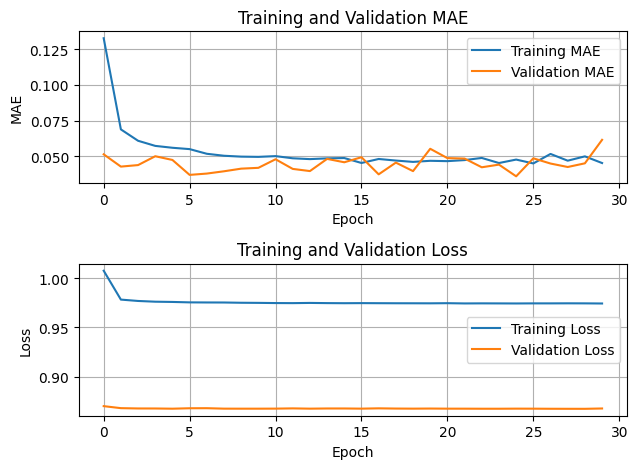

In [100]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [101]:
predictors = ratingFeatures + sentimentFeatures + ["year"]

In [102]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [104]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

In [106]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 0.9752 - mean_absolute_error: 0.0517 - val_loss: 0.8667 - val_mean_absolute_error: 0.0433
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9731 - mean_absolute_error: 0.0449 - val_loss: 0.8659 - val_mean_absolute_error: 0.0410
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9720 - mean_absolute_error: 0.0457 - val_loss: 0.8638 - val_mean_absolute_error: 0.0421
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9709 - mean_absolute_error: 0.0419 - val_loss: 0.8646 - val_mean_absolute_error: 0.0693
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9699 - mean_absolute_error: 0.0493 - val_loss: 0.8626 - val_mean_absolute_error: 0.0368
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9690 - mean_absolute_error: 0.0438 - val_loss: 0.8631 - val_mean_absolute_error: 0.0352
Epoch 7/30
302/3

In [109]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 0.06902967816634058


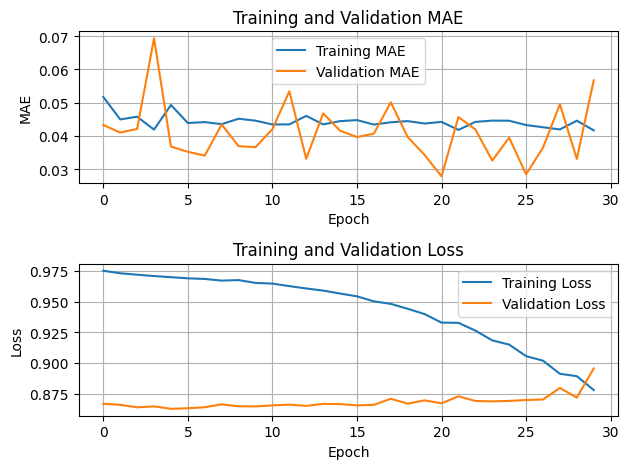

In [110]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [111]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(len(predictors), )),
    Dense(8, activation='relu'),
    Dense(1)
])

In [114]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 1.0056 - mean_absolute_error: 0.1364 - val_loss: 0.8713 - val_mean_absolute_error: 0.0836
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9763 - mean_absolute_error: 0.0743 - val_loss: 0.8674 - val_mean_absolute_error: 0.0699
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9734 - mean_absolute_error: 0.0666 - val_loss: 0.8664 - val_mean_absolute_error: 0.0624
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9721 - mean_absolute_error: 0.0621 - val_loss: 0.8651 - val_mean_absolute_error: 0.0626
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9715 - mean_absolute_error: 0.0601 - val_loss: 0.8647 - val_mean_absolute_error: 0.0647
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9710 - mean_absolute_error: 0.0600 - val_loss: 0.8644 - val_mean_absolute_error: 0.0559
Epoch 7/30
302/3

In [115]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 0.06607998626427136


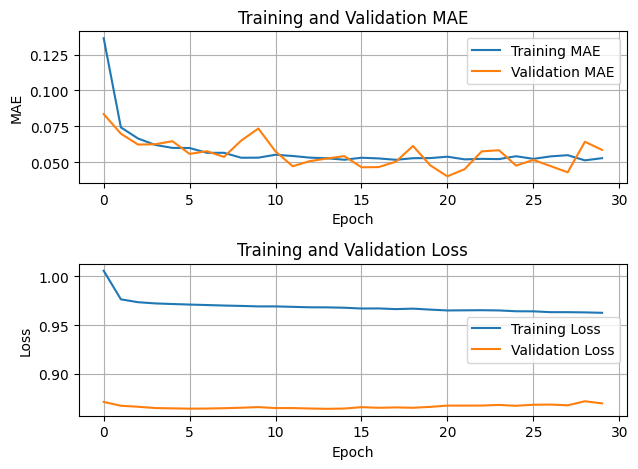

In [116]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [119]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [120]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 3s 4ms/step - loss: 0.9744 - mean_absolute_error: 0.0548 - val_loss: 0.8666 - val_mean_absolute_error: 0.0446
Epoch 2/30
302/302 [==============================] - 1s 4ms/step - loss: 0.9731 - mean_absolute_error: 0.0522 - val_loss: 0.8649 - val_mean_absolute_error: 0.0564
Epoch 3/30
302/302 [==============================] - 1s 4ms/step - loss: 0.9727 - mean_absolute_error: 0.0532 - val_loss: 0.8642 - val_mean_absolute_error: 0.0464
Epoch 4/30
302/302 [==============================] - 1s 4ms/step - loss: 0.9713 - mean_absolute_error: 0.0515 - val_loss: 0.8646 - val_mean_absolute_error: 0.0446
Epoch 5/30
302/302 [==============================] - 1s 4ms/step - loss: 0.9707 - mean_absolute_error: 0.0537 - val_loss: 0.8656 - val_mean_absolute_error: 0.0637
Epoch 6/30
302/302 [==============================] - 1s 4ms/step - loss: 0.9701 - mean_absolute_error: 0.0519 - val_loss: 0.8654 - val_mean_absolute_error: 0.0448
Epoch 7/30
302/3

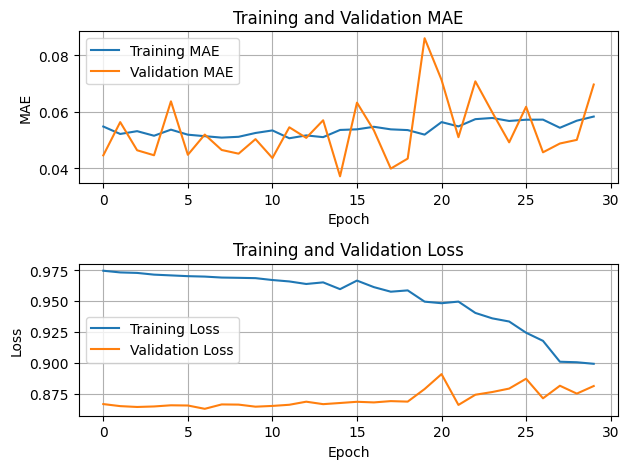

In [121]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [122]:
from sklearn.linear_model import Lasso
predictors = ratingFeatures + ["sentiment_textblob", "sentiment_vader"]

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [124]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [125]:
_alpha = 0.002

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['build_qual_rating' 'sentiment_textblob' 'sentiment_vader']


In [126]:
predictors = selected_features

In [127]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

In [129]:
from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(1)
])

In [131]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 0.9762 - mean_absolute_error: 0.0591 - val_loss: 0.8703 - val_mean_absolute_error: 0.0501
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9758 - mean_absolute_error: 0.0562 - val_loss: 0.8686 - val_mean_absolute_error: 0.0432
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9749 - mean_absolute_error: 0.0529 - val_loss: 0.8742 - val_mean_absolute_error: 0.0833
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9752 - mean_absolute_error: 0.0551 - val_loss: 0.8678 - val_mean_absolute_error: 0.0421
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9751 - mean_absolute_error: 0.0521 - val_loss: 0.8677 - val_mean_absolute_error: 0.0424
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9746 - mean_absolute_error: 0.0513 - val_loss: 0.8690 - val_mean_absolute_error: 0.0486
Epoch 7/30
302/3

In [132]:
y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

341/341 [==============================] - 0s 1ms/step
Test MAE: 0.05503110500456992


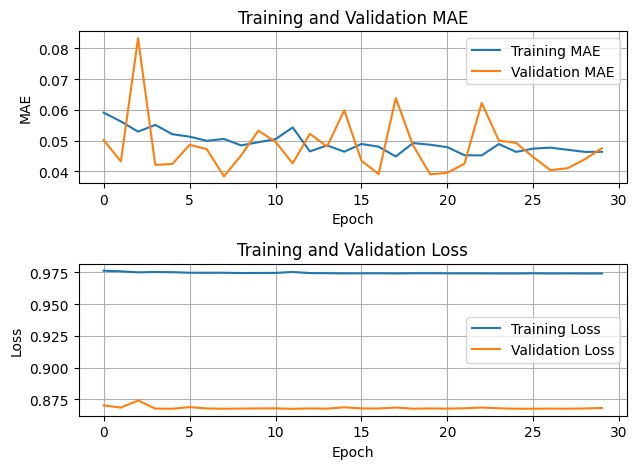

In [133]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [134]:
from sklearn.linear_model import Lasso
predictors = ratingFeatures + ["sentiment_textblob", "sentiment_vader"]

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.001

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['comfort_rating' 'fuel_econ_rating' 'fun_rating' 'exterior_rating'
 'build_qual_rating' 'sentiment_textblob' 'sentiment_vader']


In [135]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(predictors), )),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 0.9773 - mean_absolute_error: 0.0702 - val_loss: 0.8682 - val_mean_absolute_error: 0.0498
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9759 - mean_absolute_error: 0.0609 - val_loss: 0.8697 - val_mean_absolute_error: 0.0815
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9753 - mean_absolute_error: 0.0607 - val_loss: 0.8687 - val_mean_absolute_error: 0.0683
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9752 - mean_absolute_error: 0.0600 - val_loss: 0.8682 - val_mean_absolute_error: 0.0571
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9744 - mean_absolute_error: 0.0587 - val_loss: 0.8679 - val_mean_absolute_error: 0.0439
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9742 - mean_absolute_error: 0.0567 - val_loss: 0.8683 - val_mean_absolute_error: 0.0593
Epoch 7/30
302/3

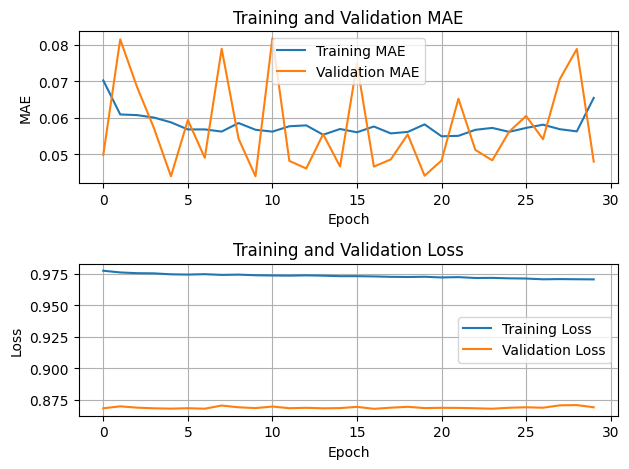

In [137]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [138]:
from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"]

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.001

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['comfort_rating' 'fun_rating' 'exterior_rating' 'build_qual_rating'
 'sentiment_textblob' 'sentiment_label' 'year']


In [139]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [140]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 0.9833 - mean_absolute_error: 0.0996 - val_loss: 0.8658 - val_mean_absolute_error: 0.0693
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9735 - mean_absolute_error: 0.0676 - val_loss: 0.8645 - val_mean_absolute_error: 0.0586
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9726 - mean_absolute_error: 0.0632 - val_loss: 0.8641 - val_mean_absolute_error: 0.0563
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9722 - mean_absolute_error: 0.0594 - val_loss: 0.8647 - val_mean_absolute_error: 0.0719
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9719 - mean_absolute_error: 0.0612 - val_loss: 0.8638 - val_mean_absolute_error: 0.0624
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9717 - mean_absolute_error: 0.0608 - val_loss: 0.8640 - val_mean_absolute_error: 0.0565
Epoch 7/30
302/3

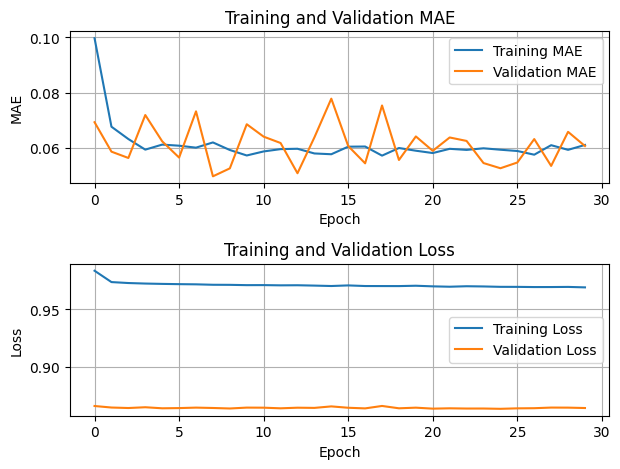

In [141]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [147]:
data["thumbs_up_pct"] = (data["cnt_thumbs_up"] / (data["cnt_thumbs_up"] + data["cnt_thumbs_down"])) + 0.00000001

In [148]:
data["thumbs_up_pct"].describe()

count    5.516700e+04
mean     7.806128e-01
std      3.291065e-01
min      1.000000e-08
25%      6.250000e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: thumbs_up_pct, dtype: float64

In [152]:
data['thumbs_up_pct'].fillna(data['thumbs_up_pct'].mean(), inplace=True)

In [153]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

predictors = ratingFeatures + sentimentFeatures + ["year"]
_x = data[predictors]
_y = data["thumbs_up_pct"]

scaler = StandardScaler()
_x_scaled = scaler.fit_transform(_x)

model = LinearRegression().fit(_x_scaled, _y)

coefficients = pd.Series(model.coef_, index=predictors)
sorted_coefficients = coefficients.sort_values()

r2_score = model.score(_x_scaled, _y)

print(sorted_coefficients)
print("R² score:", r2_score)

exterior_rating         -0.022292
reliab_rating           -0.017683
perform_rating          -0.010795
sentiment_label_score   -0.008249
sentiment_textblob      -0.001968
year                    -0.000967
sentiment_label          0.003970
comfort_rating           0.005565
interior_rating          0.007505
fuel_econ_rating         0.012941
build_qual_rating        0.016243
fun_rating               0.022089
sentiment_vader          0.029790
dtype: float64
R² score: 0.028079166494068164


In [154]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(len(predictors), )),
    Dense(8, activation='relu'),
    Dense(1)
])

Baseline Mean Absolute Error (MAE): 0.1374495327902618


In [155]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 0.4900 - mean_absolute_error: 0.5343 - val_loss: 0.0702 - val_mean_absolute_error: 0.1907
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0643 - mean_absolute_error: 0.1806 - val_loss: 0.0602 - val_mean_absolute_error: 0.1729
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0579 - mean_absolute_error: 0.1674 - val_loss: 0.0563 - val_mean_absolute_error: 0.1632
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0550 - mean_absolute_error: 0.1598 - val_loss: 0.0546 - val_mean_absolute_error: 0.1582
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0536 - mean_absolute_error: 0.1550 - val_loss: 0.0535 - val_mean_absolute_error: 0.1535
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0526 - mean_absolute_error: 0.1516 - val_loss: 0.0529 - val_mean_absolute_error: 0.1501
Epoch 7/30
302/3

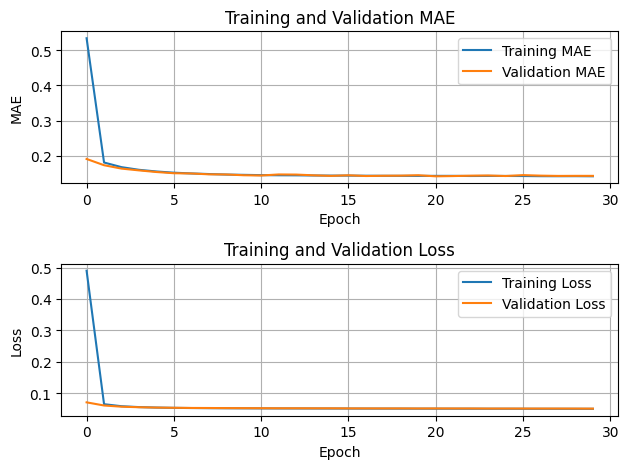

In [156]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [157]:
xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(8, activation='relu', input_shape=(len(predictors), )),
    Dense(4, activation='relu'),
    Dense(1)
])

Baseline Mean Absolute Error (MAE): 0.1374495327902618


In [158]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 0.7261 - mean_absolute_error: 0.6697 - val_loss: 0.1332 - val_mean_absolute_error: 0.2809
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0938 - mean_absolute_error: 0.2274 - val_loss: 0.0770 - val_mean_absolute_error: 0.2027
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0685 - mean_absolute_error: 0.1872 - val_loss: 0.0650 - val_mean_absolute_error: 0.1805
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0609 - mean_absolute_error: 0.1718 - val_loss: 0.0599 - val_mean_absolute_error: 0.1675
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0573 - mean_absolute_error: 0.1627 - val_loss: 0.0571 - val_mean_absolute_error: 0.1602
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0552 - mean_absolute_error: 0.1569 - val_loss: 0.0555 - val_mean_absolute_error: 0.1568
Epoch 7/30
302/3

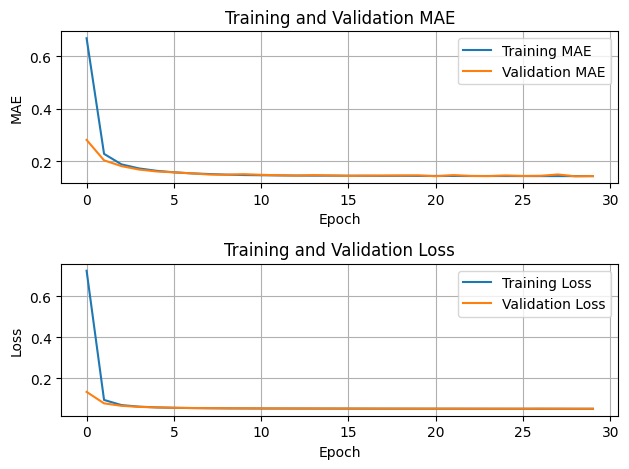

In [159]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [160]:
from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"]

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.001

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['fuel_econ_rating' 'fun_rating' 'exterior_rating' 'reliab_rating'
 'sentiment_vader' 'sentiment_label' 'sentiment_label_score']


In [162]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.1374495327902618


In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 0.2034 - mean_absolute_error: 0.3298 - val_loss: 0.0622 - val_mean_absolute_error: 0.1761
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0566 - mean_absolute_error: 0.1637 - val_loss: 0.0552 - val_mean_absolute_error: 0.1585
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0534 - mean_absolute_error: 0.1552 - val_loss: 0.0535 - val_mean_absolute_error: 0.1540
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0522 - mean_absolute_error: 0.1513 - val_loss: 0.0524 - val_mean_absolute_error: 0.1510
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0515 - mean_absolute_error: 0.1486 - val_loss: 0.0518 - val_mean_absolute_error: 0.1488
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0510 - mean_absolute_error: 0.1471 - val_loss: 0.0516 - val_mean_absolute_error: 0.1463
Epoch 7/30
302/3

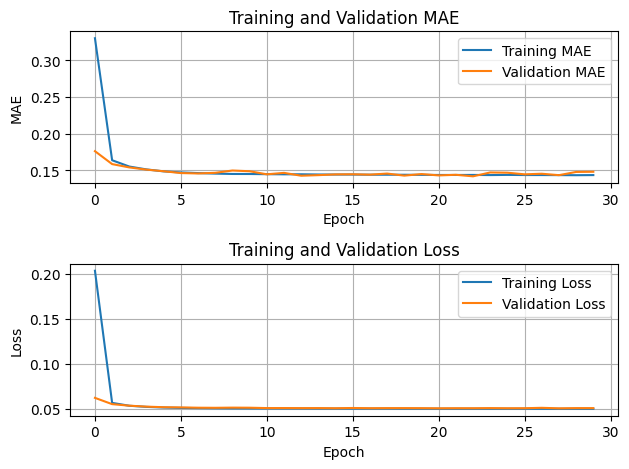

In [164]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [171]:
from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"]

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.01

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['fuel_econ_rating' 'fun_rating' 'sentiment_vader']


In [172]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data[predictors], data["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.1374495327902618


In [173]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 3ms/step - loss: 0.0968 - mean_absolute_error: 0.2196 - val_loss: 0.0564 - val_mean_absolute_error: 0.1649
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0533 - mean_absolute_error: 0.1558 - val_loss: 0.0528 - val_mean_absolute_error: 0.1534
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0517 - mean_absolute_error: 0.1485 - val_loss: 0.0520 - val_mean_absolute_error: 0.1475
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0513 - mean_absolute_error: 0.1468 - val_loss: 0.0518 - val_mean_absolute_error: 0.1482
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0512 - mean_absolute_error: 0.1460 - val_loss: 0.0515 - val_mean_absolute_error: 0.1484
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0511 - mean_absolute_error: 0.1457 - val_loss: 0.0515 - val_mean_absolute_error: 0.1469
Epoch 7/30
302/3

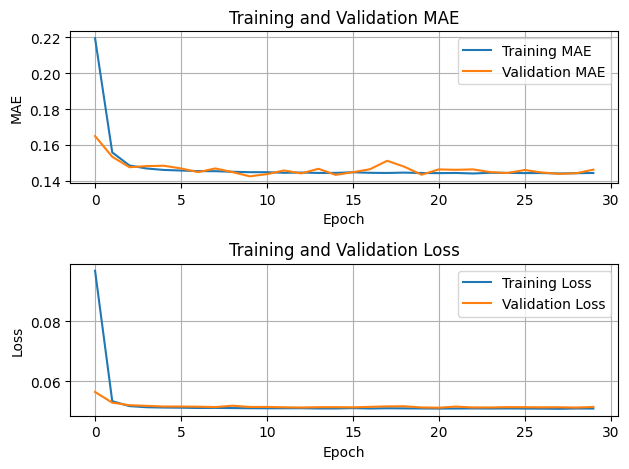

In [174]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [175]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=64, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
1205/1205 [==============================] - 5s 3ms/step - loss: 0.0619 - mean_absolute_error: 0.1651 - val_loss: 0.0520 - val_mean_absolute_error: 0.1527
Epoch 2/30
1205/1205 [==============================] - 4s 3ms/step - loss: 0.0515 - mean_absolute_error: 0.1465 - val_loss: 0.0528 - val_mean_absolute_error: 0.1517
Epoch 3/30
1205/1205 [==============================] - 4s 3ms/step - loss: 0.0515 - mean_absolute_error: 0.1462 - val_loss: 0.0515 - val_mean_absolute_error: 0.1419
Epoch 4/30
1205/1205 [==============================] - 4s 3ms/step - loss: 0.0514 - mean_absolute_error: 0.1461 - val_loss: 0.0516 - val_mean_absolute_error: 0.1432
Epoch 5/30
1205/1205 [==============================] - 4s 3ms/step - loss: 0.0513 - mean_absolute_error: 0.1459 - val_loss: 0.0515 - val_mean_absolute_error: 0.1415
Epoch 6/30
1205/1205 [==============================] - 4s 3ms/step - loss: 0.0512 - mean_absolute_error: 0.1454 - val_loss: 0.0514 - val_mean_absolute_error: 0.1489
Epoc

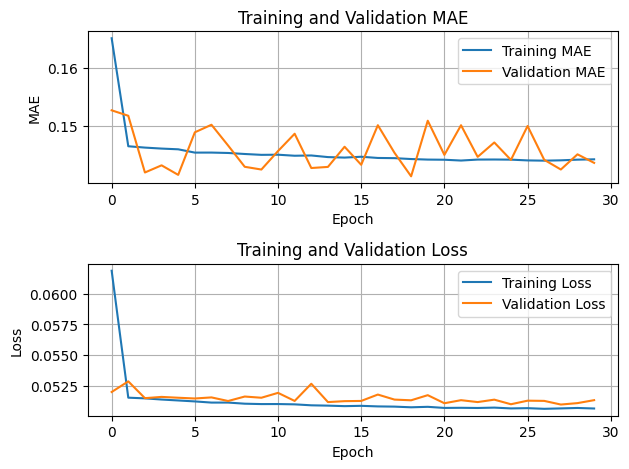

In [176]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [177]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=50, batch_size=32, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/50
2409/2409 [==============================] - 8s 3ms/step - loss: 0.0541 - mean_absolute_error: 0.1535 - val_loss: 0.0516 - val_mean_absolute_error: 0.1456
Epoch 2/50
2409/2409 [==============================] - 7s 3ms/step - loss: 0.0514 - mean_absolute_error: 0.1467 - val_loss: 0.0516 - val_mean_absolute_error: 0.1463
Epoch 3/50
2409/2409 [==============================] - 7s 3ms/step - loss: 0.0513 - mean_absolute_error: 0.1461 - val_loss: 0.0514 - val_mean_absolute_error: 0.1455
Epoch 4/50
2409/2409 [==============================] - 7s 3ms/step - loss: 0.0513 - mean_absolute_error: 0.1460 - val_loss: 0.0516 - val_mean_absolute_error: 0.1502
Epoch 5/50
2409/2409 [==============================] - 7s 3ms/step - loss: 0.0512 - mean_absolute_error: 0.1456 - val_loss: 0.0522 - val_mean_absolute_error: 0.1515
Epoch 6/50
2409/2409 [==============================] - 7s 3ms/step - loss: 0.0510 - mean_absolute_error: 0.1452 - val_loss: 0.0515 - val_mean_absolute_error: 0.1433
Epoc

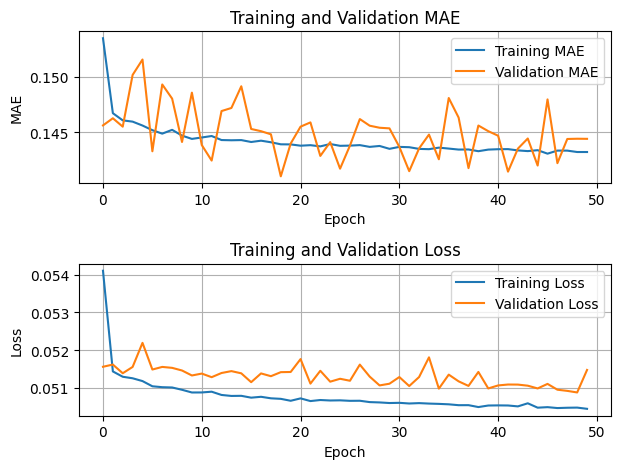

In [178]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [183]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoded_columns = encoder.fit_transform(data[['make']])

column_names = encoder.categories_[0]

encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

data_encoded = pd.concat([data, encoded_df], axis=1)

from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"] + list(encoded_df.columns)

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.0

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['perform_rating' 'comfort_rating' 'fuel_econ_rating' 'fun_rating'
 'interior_rating' 'exterior_rating' 'build_qual_rating' 'reliab_rating'
 'sentiment_textblob' 'sentiment_vader' 'sentiment_label'
 'sentiment_label_score' 'year' 'ACURA' 'ASTON-MARTIN' 'AUDI' 'BENTLEY'
 'BMW' 'BUGATTI' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE'
 'FERRARI' 'FIAT' 'FISKER' 'FORD' 'GENESIS' 'GMC' 'HONDA' 'HUMMER'
 'HYUNDAI' 'INFINITI' 'ISUZU' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI'
 'LAND-ROVER' 'LEXUS' 'LINCOLN' 'LOTUS' 'MASERATI' 'MAYBACH' 'MAZDA'
 'MERCEDES-BENZ' 'MERCURY' 'MINI' 'MITSUBISHI' 'NISSAN' 'PONTIAC'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SAAB' 'SATURN' 'SCION' 'SMART' 'SPYKER'
 'SUBARU' 'SUZUKI' 'TESLA' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']


In [184]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.1374495327902618


In [185]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 0.1181 - mean_absolute_error: 0.2317 - val_loss: 0.0605 - val_mean_absolute_error: 0.1714
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0574 - mean_absolute_error: 0.1615 - val_loss: 0.0559 - val_mean_absolute_error: 0.1586
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0540 - mean_absolute_error: 0.1545 - val_loss: 0.0553 - val_mean_absolute_error: 0.1529
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0532 - mean_absolute_error: 0.1516 - val_loss: 0.0537 - val_mean_absolute_error: 0.1516
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0523 - mean_absolute_error: 0.1495 - val_loss: 0.0532 - val_mean_absolute_error: 0.1498
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0519 - mean_absolute_error: 0.1480 - val_loss: 0.0525 - val_mean_absolute_error: 0.1480
Epoch 7/30
302/3

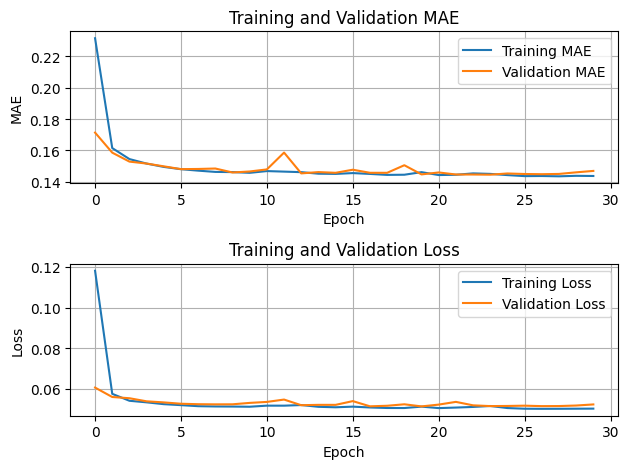

In [186]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [187]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoded_columns = encoder.fit_transform(data[['make']])

column_names = encoder.categories_[0]

encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

data_encoded = pd.concat([data, encoded_df], axis=1)

from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"] + list(encoded_df.columns)

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.005

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['fuel_econ_rating' 'fun_rating' 'sentiment_vader' 'sentiment_label'
 'sentiment_label_score' 'HONDA']


In [188]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["thumbs_up_pct"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.1374495327902618


In [190]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 0.1006 - mean_absolute_error: 0.2312 - val_loss: 0.0560 - val_mean_absolute_error: 0.1616
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0530 - mean_absolute_error: 0.1530 - val_loss: 0.0526 - val_mean_absolute_error: 0.1501
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0517 - mean_absolute_error: 0.1478 - val_loss: 0.0521 - val_mean_absolute_error: 0.1499
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0514 - mean_absolute_error: 0.1466 - val_loss: 0.0518 - val_mean_absolute_error: 0.1458
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0513 - mean_absolute_error: 0.1459 - val_loss: 0.0518 - val_mean_absolute_error: 0.1476
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.0511 - mean_absolute_error: 0.1457 - val_loss: 0.0517 - val_mean_absolute_error: 0.1444
Epoch 7/30
302/3

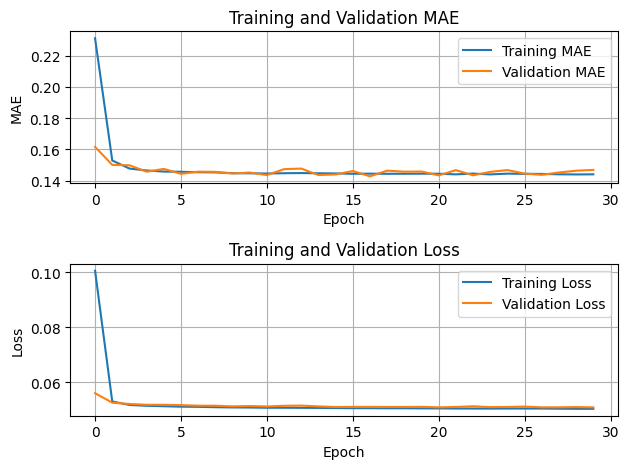

In [192]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [196]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoded_columns = encoder.fit_transform(data[['make']])

column_names = encoder.categories_[0]

encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

data_encoded = pd.concat([data, encoded_df], axis=1)

from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"] + list(encoded_df.columns)

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["total_eng"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 10

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['comfort_rating' 'exterior_rating' 'build_qual_rating'
 'sentiment_textblob' 'year' 'ACURA' 'HYUNDAI' 'JAGUAR' 'JEEP' 'KIA'
 'MAZDA' 'MERCEDES-BENZ' 'NISSAN' 'PORSCHE' 'SCION' 'SUZUKI' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']


In [197]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["total_eng"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 216.3719949654891


In [198]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 17751356.0000 - mean_absolute_error: 99.1327 - val_loss: 15805290.0000 - val_mean_absolute_error: 97.2660
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 17750106.0000 - mean_absolute_error: 100.7473 - val_loss: 15803595.0000 - val_mean_absolute_error: 101.1653
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 17746190.0000 - mean_absolute_error: 109.4956 - val_loss: 15799486.0000 - val_mean_absolute_error: 115.0990
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 17739786.0000 - mean_absolute_error: 128.1833 - val_loss: 15794736.0000 - val_mean_absolute_error: 133.8698
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 17732898.0000 - mean_absolute_error: 150.5647 - val_loss: 15790293.0000 - val_mean_absolute_error: 152.6776
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 17726310.0000 - me

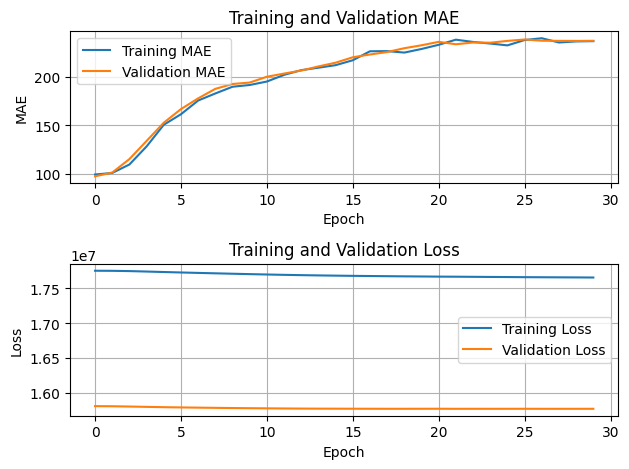

In [199]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [202]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoded_columns = encoder.fit_transform(data[['make']])

column_names = encoder.categories_[0]

encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

data_encoded = pd.concat([data, encoded_df], axis=1)

from sklearn.linear_model import Lasso
predictors = ratingFeatures + sentimentFeatures + ["year"] + list(encoded_df.columns)

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

_alpha = 0.005

lasso = Lasso(alpha=_alpha)
lasso.fit(xTrain_scaled, yTrain)

coefficients = lasso.coef_
selected_features = np.array(predictors)[coefficients != 0]
print(f'Selected Features: {selected_features}')

Selected Features: ['comfort_rating' 'exterior_rating' 'build_qual_rating' 'year' 'JAGUAR'
 'PORSCHE' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']


In [204]:
predictors = selected_features

xTrain, xTemp, yTrain, yTemp = train_test_split(data_encoded[predictors], data_encoded["total_eng_scaled"], test_size=0.3, random_state=randomNum)
xVal, xTest, yVal, yTest = train_test_split(xTemp, yTemp, test_size=0.33, random_state=randomNum)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)

from sklearn.metrics import mean_absolute_error

baseline_prediction = np.mean(yTrain)
y_pred_baseline = np.full_like(yTest, baseline_prediction)
baseline_mae = mean_absolute_error(yTest, y_pred_baseline)

print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')

Baseline Mean Absolute Error (MAE): 0.05070654115718119


In [205]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=30, batch_size=256, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/30
302/302 [==============================] - 2s 4ms/step - loss: 0.9946 - mean_absolute_error: 0.0954 - val_loss: 0.8664 - val_mean_absolute_error: 0.0578
Epoch 2/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9751 - mean_absolute_error: 0.0650 - val_loss: 0.8684 - val_mean_absolute_error: 0.0676
Epoch 3/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9735 - mean_absolute_error: 0.0633 - val_loss: 0.8665 - val_mean_absolute_error: 0.0561
Epoch 4/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9739 - mean_absolute_error: 0.0594 - val_loss: 0.8682 - val_mean_absolute_error: 0.0665
Epoch 5/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9718 - mean_absolute_error: 0.0605 - val_loss: 0.8711 - val_mean_absolute_error: 0.0712
Epoch 6/30
302/302 [==============================] - 1s 3ms/step - loss: 0.9720 - mean_absolute_error: 0.0573 - val_loss: 0.8700 - val_mean_absolute_error: 0.0565
Epoch 7/30
302/3

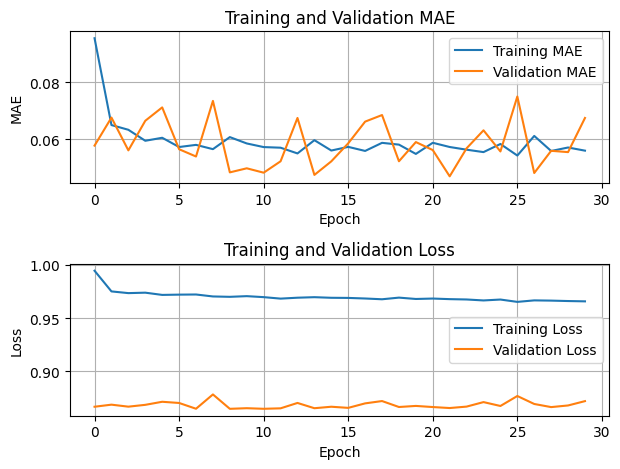

In [206]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [207]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(xTrain_scaled, yTrain, epochs=50, batch_size=64, validation_data=(xVal_scaled, yVal), verbose=1)

y_pred = model.predict(xTest_scaled)
test_mae = mean_absolute_error(yTest, y_pred)
print(f'Test MAE: {test_mae}')

Epoch 1/50
1205/1205 [==============================] - 5s 3ms/step - loss: 0.9780 - mean_absolute_error: 0.0670 - val_loss: 0.8661 - val_mean_absolute_error: 0.0714
Epoch 2/50
1205/1205 [==============================] - 4s 3ms/step - loss: 0.9735 - mean_absolute_error: 0.0603 - val_loss: 0.8655 - val_mean_absolute_error: 0.0596
Epoch 3/50
1205/1205 [==============================] - 4s 3ms/step - loss: 0.9731 - mean_absolute_error: 0.0606 - val_loss: 0.8658 - val_mean_absolute_error: 0.0540
Epoch 4/50
1205/1205 [==============================] - 4s 3ms/step - loss: 0.9721 - mean_absolute_error: 0.0593 - val_loss: 0.8653 - val_mean_absolute_error: 0.0549
Epoch 5/50
1205/1205 [==============================] - 4s 3ms/step - loss: 0.9715 - mean_absolute_error: 0.0603 - val_loss: 0.8691 - val_mean_absolute_error: 0.0729
Epoch 6/50
1205/1205 [==============================] - 4s 3ms/step - loss: 0.9703 - mean_absolute_error: 0.0584 - val_loss: 0.8670 - val_mean_absolute_error: 0.0611
Epoc

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()